# CNN - Deep Learning Model Training & Testing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import seaborn as sns; sns.set(font_scale=1.4)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [3]:
class_names = ['non_valid_plate', 'valid_plate']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

# class_names_label -> 'non_valid_plate': 0, 'valid_plate': 1}

nb_classes = len(class_names)
print(class_names_label)

IMAGE_SIZE = (300, 300)

{'non_valid_plate': 0, 'valid_plate': 1}


#### Loading the dataset and preprocessing

In [4]:
# Loading the data

DIRECTORY = r'/content/drive/MyDrive/datasets/dataset_cnn'
CATEGORY = ['train', 'test']

output = []

for category in CATEGORY:
    path = os.path.join(DIRECTORY, category)
    print(f'Current working directory : {path}')
    images = []
    labels = []

    print(f"Loading {category} images...")

    for folder in os.listdir(path):
        label = class_names_label[folder]

        # Iterate through each image in our folder
        for file in os.listdir(os.path.join(path, folder)):

            # Get the path name of the image
            img_path = os.path.join(os.path.join(path, folder), file)

            # Open and resize the img
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, IMAGE_SIZE)

            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    output.append((images, labels))

Current working directory : /content/drive/MyDrive/datasets/dataset_cnn/train
Loading train images...
Current working directory : /content/drive/MyDrive/datasets/dataset_cnn/test
Loading test images...


#### Split the data into training and testing sets

In [5]:
# Splitting the data into training and testing data
# Train data %80 - Test data %20
(X_train, Y_train), (X_test, Y_test) = output
print('X_train shape : ', X_train.shape)
print('Y_train shape : ', Y_train.shape)
print('X_test shape : ', X_test.shape)
print('Y_test shape : ', Y_test.shape)

X_train shape :  (320, 300, 300, 3)
Y_train shape :  (320,)
X_test shape :  (80, 300, 300, 3)
Y_test shape :  (80,)


In [6]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=44)

In [7]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    figsize = (20, 20)
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Some examples of images of the dataset', fontsize=24)
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image = cv2.resize(images[i], (150, 150))
        plt.imshow(image.astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, X_train, Y_train)

Output hidden; open in https://colab.research.google.com to view.

### Training the Model

#### Building Our Model

In [8]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),   
    tf.keras.layers.Conv2D(32, (4, 4), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),   
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(nb_classes, activation=tf.nn.softmax)         # Output layer (nn_classes = 2)
])

#### Summary of our model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 295, 295, 32)      16416     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 145, 145, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 663552)            0

#### Compiling the Model

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training the Model

In [11]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
8/8 [==============================] - 126s 16s/step - loss: 3099.9844 - accuracy: 0.4922 - val_loss: 103.0236 - val_accuracy: 0.5469
Epoch 2/5
8/8 [==============================] - 121s 15s/step - loss: 35.4609 - accuracy: 0.5117 - val_loss: 5.9708 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 121s 15s/step - loss: 4.3953 - accuracy: 0.6133 - val_loss: 3.4146 - val_accuracy: 0.5625
Epoch 4/5
8/8 [==============================] - 125s 16s/step - loss: 1.6657 - accuracy: 0.8047 - val_loss: 1.5657 - val_accuracy: 0.7031
Epoch 5/5
8/8 [==============================] - 123s 15s/step - loss: 0.9119 - accuracy: 0.9648 - val_loss: 1.4532 - val_accuracy: 0.7812


### Evaluating the Model

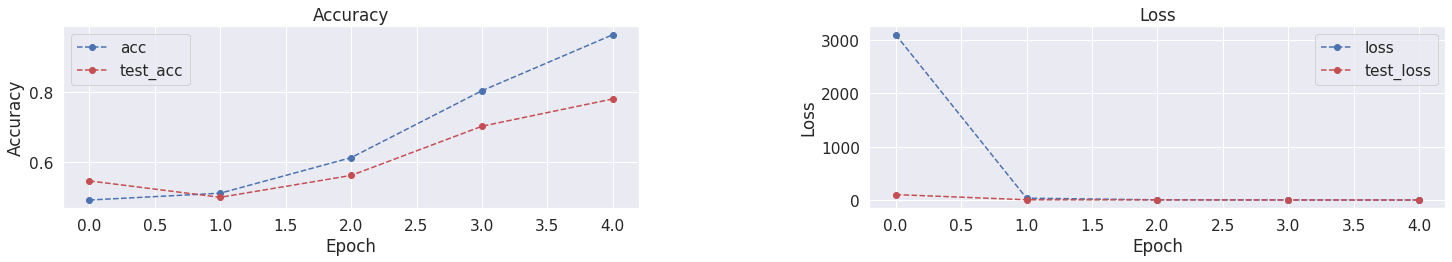

In [12]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the NN.
    """
    fig = plt.figure(figsize=(24, 12))

    # Plot accuracy
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='test_acc')
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()



    # Plot Loss function
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='test_loss')
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

    plt.show()

plot_accuracy_loss(history)

#### Testing the Model

In [13]:
test_loss = model.evaluate(X_test, Y_test)

3/3 [==============================] - 8s 2s/step - loss: 1.5414 - accuracy: 0.7750


In [14]:
print('Test Accuracy :', str(round(test_loss[1] * 100, 2)) + '%')

Test Accuracy : 77.5%


#### Classification Metrics 

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score  
predictions = model.predict(X_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis=1) # We take the highest probability
print(classification_report(Y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        40
           1       0.81      0.72      0.76        40

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



In [16]:
accuracy = accuracy_score(Y_test, pred_labels)
recall = recall_score(Y_test, pred_labels, average='macro')
precision = precision_score(Y_test, pred_labels, average='macro')
f1 = f1_score(Y_test, pred_labels, average='macro')

print(f'Accuracy : {round(accuracy * 100, 2)}%')
print(f'Recall : {round(recall * 100, 2)}%')
print(f'Precision : {round(precision * 100, 2)}%')
print(f'F1 Score : {round(f1 * 100, 2)}%')

Accuracy : 77.5%
Recall : 77.5%
Precision : 77.78%
F1 Score : 77.44%


#### Confusion Matrix

[[33  7]
 [11 29]]


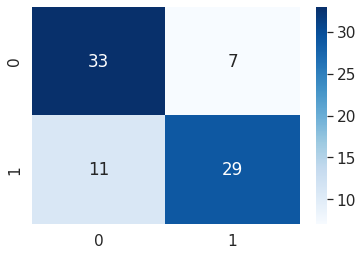

In [17]:
cm = confusion_matrix(Y_test, pred_labels)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')